# ------ Import Modules ------

In [1]:
# import necessary modules
import pandas as pd
import numpy as np
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
import os 
from pandas_profiling import ProfileReport
from machine_learning import MachineLearning, data_types
from config import GetDict
from eda_functions import GetProviderCount
from sklearn.utils import resample
from IPython.display import HTML, IFrame

# suppress warnings
warnings.filterwarnings('ignore')

# ------ Exploratory Data Analysis ------

## Load Data

In [2]:
# set pandas options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 50)

# load data
claim_data = pd.read_csv(os.path.join('../data','original','claim_sample.tar.gz'), 
                         compression='gzip', 
                         dtype=data_types,
                         low_memory=False)

# drop first column
claim_data.drop('claim.sample.csv', axis=1, inplace=True)

# drop last row
claim_data.dropna(inplace=True)

In [3]:
# show claim data information
claim_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 472559 entries, 0 to 472558
Data columns (total 28 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Claim.Number               472559 non-null  float64
 1   Claim.Line.Number          472559 non-null  object 
 2   Member.ID                  472559 non-null  object 
 3   Provider.ID                472559 non-null  object 
 4   Line.Of.Business.ID        472559 non-null  object 
 5   Revenue.Code               472559 non-null  object 
 6   Service.Code               472559 non-null  object 
 7   Place.Of.Service.Code      472559 non-null  object 
 8   Procedure.Code             472559 non-null  object 
 9   Diagnosis.Code             472559 non-null  object 
 10  Claim.Charge.Amount        472559 non-null  float64
 11  Denial.Reason.Code         472559 non-null  object 
 12  Price.Index                472559 non-null  object 
 13  In.Out.Of.Network          47

In [4]:
# get the unique claims
averages = claim_data.groupby('Claim.Number')['Claim.Line.Number'].max()
average_lines_per_claim = np.average(averages.values.astype('int'))
f"The average lines per claim is {average_lines_per_claim}"

'The average lines per claim is 5.012449987230783'

In [5]:
# describe numeric columns
claim_data.describe()

,Claim.Number,Claim.Charge.Amount,Subscriber.Payment.Amount,Provider.Payment.Amount
count,4.725590e+05,472559.000000,472559.000000,472559.000000
mean,6.876433e+08,1684.487052,0.060524,299.664982
std,4.631736e+08,6516.274159,14.559293,2651.754216
min,1.899000e+04,-192496.200000,0.000000,0.000000
25%,2.554021e+08,141.831700,0.000000,0.000000
50%,6.453732e+08,327.142500,0.000000,0.000000
75%,1.060539e+09,1072.781000,0.000000,0.000000
max,1.541242e+09,756336.700000,7625.259600,491735.200000


In [6]:
# look at the claim with the lowest amount
claim_data.loc[claim_data['Claim.Charge.Amount'] == min(claim_data['Claim.Charge.Amount'])]

,Claim.Number,Claim.Line.Number,Member.ID,Provider.ID,Line.Of.Business.ID,Revenue.Code,Service.Code,Place.Of.Service.Code,Procedure.Code,Diagnosis.Code,Claim.Charge.Amount,Denial.Reason.Code,Price.Index,In.Out.Of.Network,Reference.Index,Pricing.Index,Capitation.Index,Subscriber.Payment.Amount,Provider.Payment.Amount,Group.Index,Subscriber.Index,Subgroup.Index,Claim.Type,Claim.Subscriber.Type,Claim.Pre.Prince.Index,Claim.Current.Status,Network.ID,Agreement.ID
466009,1.389507e+09,5,94431843,FA0001774001,,278,AL7I,,,8052,-192496.2,,,,,,,0.0,0.0,48547,76494000,52030,M,H,,99,,
466010,1.389507e+09,6,94431843,FA0001774001,,278,AL7I,,,8052,-192496.2,,,,,,,0.0,0.0,48547,76494000,52030,M,H,,99,,
466049,1.389507e+09,3,94431843,FA0001774001,,278,AL7I,,,8052,-192496.2,,,,,,,0.0,0.0,48547,76494000,52030,M,H,,2,,


In [7]:
# look at all of the claim data
claim_data.iloc[466047:466054]

,Claim.Number,Claim.Line.Number,Member.ID,Provider.ID,Line.Of.Business.ID,Revenue.Code,Service.Code,Place.Of.Service.Code,Procedure.Code,Diagnosis.Code,Claim.Charge.Amount,Denial.Reason.Code,Price.Index,In.Out.Of.Network,Reference.Index,Pricing.Index,Capitation.Index,Subscriber.Payment.Amount,Provider.Payment.Amount,Group.Index,Subscriber.Index,Subgroup.Index,Claim.Type,Claim.Subscriber.Type,Claim.Pre.Prince.Index,Claim.Current.Status,Network.ID,Agreement.ID
466047,1.389507e+09,1,94431843,FA0001774001,,278,AL7I,,,8052,195162.700,,,,,,,0.0,0.0,48547,76494000,52030,M,H,,2,,
466048,1.389507e+09,2,94431843,FA0001774001,,300,AL7I,,,8052,1380.171,,,,,,,0.0,0.0,48547,76494000,52030,M,H,,2,,
466049,1.389507e+09,3,94431843,FA0001774001,,278,AL7I,,,8052,-192496.200,,,,,,,0.0,0.0,48547,76494000,52030,M,H,,2,,
466050,1.389507e+09,4,94431843,FA0001774001,,300,AL7I,,,8052,-138.264,,,,,,,0.0,0.0,48547,76494000,52030,M,H,,2,,
466051,1.389507e+09,5,94431843,FA0001774001,,309,AL7I,,,8052,-1241.907,,,,,,,0.0,0.0,48547,76494000,52030,M,H,,2,,
466052,1.389507e+09,6,94431843,FA0001774001,,111,RB7I,,,8052,12988.170,,,,,,,0.0,0.0,48547,76494000,52030,M,H,,2,,
466053,1.389507e+09,7,94431843,FA0001774001,,111,RB7I,,,8052,-12988.170,,,,,,,0.0,0.0,48547,76494000,52030,M,H,,2,,


In [8]:
# show the claim charge amounts 
claim_data['Claim.Charge.Amount'].value_counts(ascending=False)

84.56325       6480
0.00000        4598
118.51200      4480
123.45000      3386
248.13450      3014
               ... 
21735.84000       1
6623.83320        1
404.71848         1
554.78430         1
2433.17481        1
Name: Claim.Charge.Amount, Length: 40448, dtype: int64

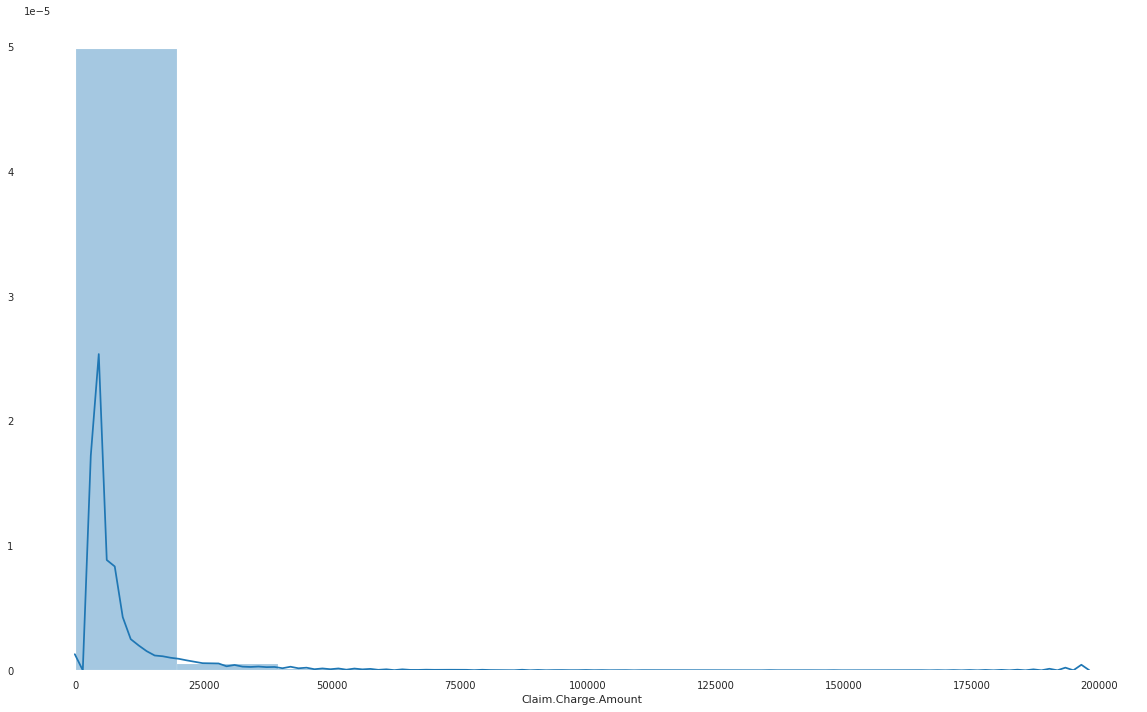

In [9]:
plt.figure(figsize=(20,12))
col = 'Claim.Charge.Amount'
claim_zero_200 = claim_data.loc[(claim_data[col] >= 0) &  (claim_data[col] <= 200000), col]
sns.distplot(claim_zero_200, bins=10);

In [10]:
# get procedure claims and add them to a list
IsProcedure = [ 1 if proc.startswith('J') else 0 for proc in claim_data['Procedure.Code']]

# add list as a new column to the dataframe
claim_data['IsProcedure'] = IsProcedure

# show a sample of the data
claim_data.loc[claim_data.IsProcedure == 1].head()

,Claim.Number,Claim.Line.Number,Member.ID,Provider.ID,Line.Of.Business.ID,Revenue.Code,Service.Code,Place.Of.Service.Code,Procedure.Code,Diagnosis.Code,Claim.Charge.Amount,Denial.Reason.Code,Price.Index,In.Out.Of.Network,Reference.Index,Pricing.Index,Capitation.Index,Subscriber.Payment.Amount,Provider.Payment.Amount,Group.Index,Subscriber.Index,Subgroup.Index,Claim.Type,Claim.Subscriber.Type,Claim.Pre.Prince.Index,Claim.Current.Status,Network.ID,Agreement.ID,IsProcedure
3073,74645490.0,10,1992052,FA0001389001,5,636,OP7O,,J1650,4359,592.201995,KAO,A,I,N,N,,0.0,0.0,114,1613650,0,M,H,S,91,P00000000001,FH001309QB01,1
3091,18860690.0,8,22808129,FA0001389001,1,636,OP7O,,J2405,64303,118.832970,J2L,A,I,N,N,R,0.0,0.0,275,18475600,483,M,H,,2,H00000000001,FH001886QH01,1
3092,18860690.0,9,22808129,FA0001389001,1,636,OP7O,,J7030,64303,196.890405,J2L,A,I,N,N,R,0.0,0.0,275,18475600,483,M,H,,2,H00000000001,FH001886QH01,1
3103,281757390.0,10,1997607,FA0001389001,5,636,OP7O,,J1650,4359,592.201995,KDR,A,I,N,N,,0.0,0.0,114,1618150,0,M,H,S,91,P00000000001,FH001309QB01,1
3114,450273590.0,10,1991496,FA0001389001,5,636,OP7O,,J1650,4359,592.201995,KAO,A,I,N,N,,0.0,0.0,114,1613200,0,M,H,S,2,P00000000001,FH001309QB01,1


# ------ Question 1 (Procedure Analysis) ------

## Part A (Find the number of claim lines that have J-codes)

In [11]:
claims_with_procedures = claim_data.loc[claim_data.IsProcedure == 1, 'Claim.Number']
f"The number of unique claims with procedures is {len(np.unique(claims_with_procedures))}"

'The number of unique claims with procedures is 10691'

## Part B (How much was paid to providers for In Network Claims?)

In [12]:
from babel.numbers import format_currency
in_network_claims_with_procedures = claim_data.loc[(claim_data['IsProcedure'] == 1)
                                                    & (claim_data['In.Out.Of.Network'] == 'I'), 'Provider.Payment.Amount']
paid_amount = round(np.sum(in_network_claims_with_procedures),2)
f"The sum of payments made to providers for in-network procedures is {format_currency(paid_amount, 'USD', locale='en_US')}"


'The sum of payments made to providers for in-network procedures is $2,417,220.96'

## Part C (What are the top five J-codes based on the payment to providers?)


In [13]:
claim_data.loc[(claim_data['IsProcedure'] == 1)
               & (claim_data['Provider.Payment.Amount'] > 0), 'Procedure.Code'].value_counts(ascending=False).head()

J2405    540
J2501    457
J7030    387
J1170    363
J1644    301
Name: Procedure.Code, dtype: int64

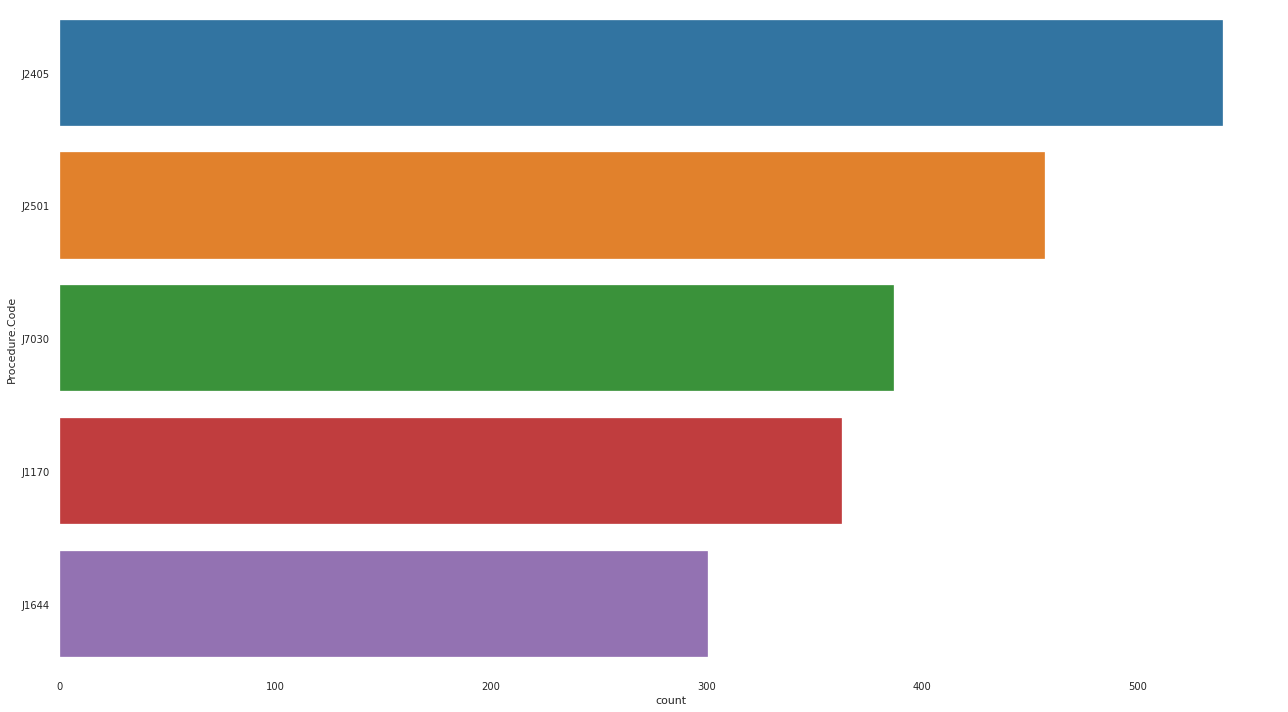

In [14]:
plt.figure(figsize=(18,10))
procedures = claim_data.loc[(claim_data['IsProcedure'] == 1)
               & (claim_data['Provider.Payment.Amount'] > 0), 'Procedure.Code']
sns.countplot(y=procedures, order=procedures.value_counts().iloc[:5].index);
plt.tight_layout()
plt.savefig(os.path.join('../','visualization',f"PaidProcedures_barchart.png"))

# ------ Question 2 (Provider Analysis) ------

## Scatter plot analysis of paid versus unpaid claims

In [15]:
# get providers with at least one paid claim
providers_with_paid_claims = claim_data.loc[(claim_data['IsProcedure'] == 1) 
               & (claim_data['Provider.Payment.Amount'] > 0), 'Provider.ID']
providers = list(set(providers_with_paid_claims))
provider_claims = [1 if prov in providers else 0 for prov in claim_data['Provider.ID']]



In [16]:
# get upaid claim data and put it into the claim dataframe
unpaid_claim_data = claim_data.loc[(claim_data['IsProcedure'] == 1) 
               & (claim_data['Provider.Payment.Amount'] == 0), 'Claim.Number'].index
unpaid_claims = np.zeros(len(claim_data))
unpaid_claims[unpaid_claim_data] = 1
claim_data['UnpaidClaim'] = unpaid_claims
claim_data['UnpaidClaim']  = claim_data['UnpaidClaim'].astype(int)

In [17]:
# get paid procedure claim data and put it into the claim dataframe
paid_claim_data = claim_data.loc[(claim_data['IsProcedure'] == 1) 
               & (claim_data['Provider.Payment.Amount'] > 0), 'Claim.Number'].index
paid_claims = np.zeros(len(claim_data))
paid_claims[paid_claim_data] = 1
claim_data['PaidClaim'] = paid_claims
claim_data['PaidClaim']  = claim_data['PaidClaim'].astype(int)

In [18]:
# produce unpaid and paid claim count by provider and load into a dataframe
provider_data = [GetProviderCount(claim_data, provider) for provider in providers]
provider_df = pd.DataFrame(provider_data, columns=['ProviderID','PaidCount','UnPaidCount'])

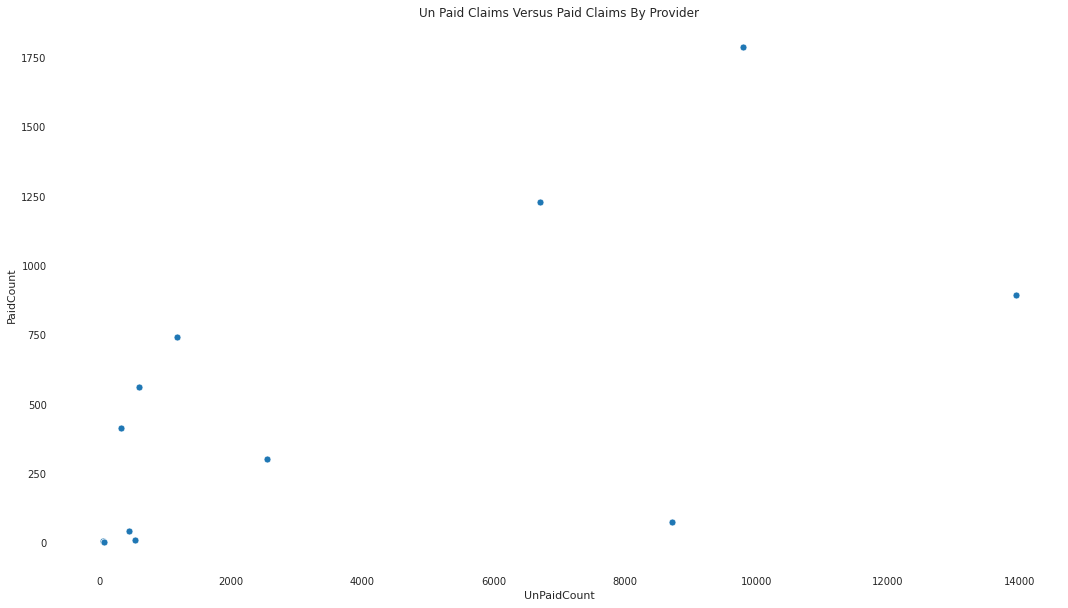

In [19]:
plt.figure(figsize=(18,10))
plt.title("Un Paid Claims Versus Paid Claims By Provider")
ax = sns.scatterplot(x='UnPaidCount', y="PaidCount", data=provider_df)
plt.savefig(os.path.join('../','visualization',f"PaidVsUnpaid_Scatterplot.png"))

## Graph Analysis and Concerns

As the numbers have stated, the provider paid percentage average is 17.69 while the average unpaid percentage is 82.31 which means that on overage healthcare organization are missing 82.31 of potential revenue. Providers have a paid percentage of anywhere between 1 to 56 percent. I would want to understand how this data relates to time as most claims are not paid until the end of the month. I would also want to understand why there is a wide discrepancy between provider paid percentages.  There is a strong positive correlation between the two variables (Paid Versus Unpaid Counts).


# ------ Question 3 (Data Analysis) ------ 

## Provider Paid Versus Unpaid Grid

In [20]:
# show paid versus upaid claim information with percentages
provider_df['Total Claims'] = provider_df['PaidCount'] + provider_df['UnPaidCount']
provider_df['Paid Percentage'] = (provider_df['PaidCount'] / provider_df['Total Claims']) * 100
provider_df['UnPaid Percentage'] = 100 - provider_df['Paid Percentage']
provider_df

,ProviderID,PaidCount,UnPaidCount,Total Claims,Paid Percentage,UnPaid Percentage
0,FA0004551001,415,322,737,56.309362,43.690638
1,FA0001387001,74,8710,8784,0.842441,99.157559
2,FA1000015002,43,449,492,8.739837,91.260163
3,FA0001389001,895,13947,14842,6.030185,93.969815
4,FA1000015001,740,1170,1910,38.743455,61.256545
5,FA1000016001,7,46,53,13.207547,86.792453
6,FA0001411001,1228,6703,7931,15.483546,84.516454
7,FA1000014002,5,49,54,9.259259,90.740741
8,FA0001389003,8,539,547,1.462523,98.537477
9,FA0001411003,4,67,71,5.633803,94.366197


## Paid Versus Unpaid Percentage Numbers

In [21]:
# get the unpaid and paid percentages
average_paid_percentage = np.average(provider_df['Paid Percentage'])
average_unpaid_percentage = np.average(provider_df['UnPaid Percentage'])
f"The average paid percentage is {average_paid_percentage} while the unpaid percentage is {average_unpaid_percentage}"

'The average paid percentage is 17.693456299234207 while the unpaid percentage is 82.3065437007658'

## Provider Paid Percentages (Grouped Bar Chart)

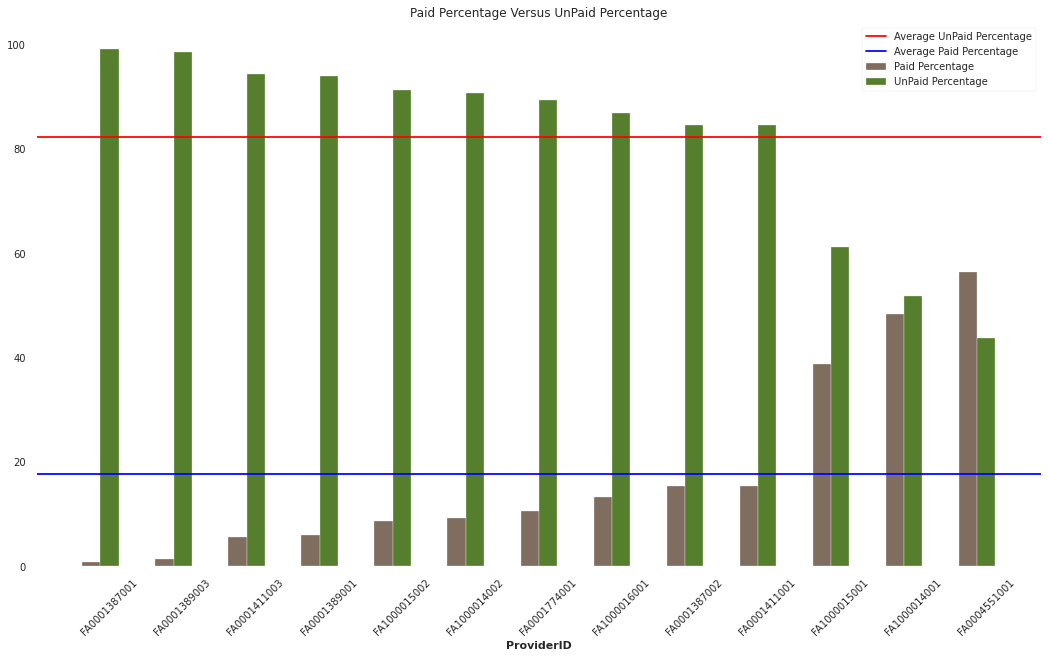

In [22]:
import numpy as np
import matplotlib.pyplot as plt
 
# set width of bar
barWidth = 0.25

# sort values before starting
provider_df = provider_df.sort_values('UnPaid Percentage', ascending=False)

# set height of bar
bars1 = provider_df['Paid Percentage'].values
bars2 = provider_df['UnPaid Percentage'].values

# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]

# set figure size
plt.figure(figsize=(18,10))
plt.title("Paid Percentage Versus UnPaid Percentage")

# Make the plot
plt.bar(r1, bars1, color='#7f6d5f', width=barWidth, edgecolor='white', label='Paid Percentage')
plt.bar(r2, bars2, color='#557f2d', width=barWidth, edgecolor='white', label='UnPaid Percentage')
 
# Add xticks on the middle of the group bars
plt.xlabel('ProviderID', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(bars1))], provider_df['ProviderID'].values, rotation=45)
 
# Add a static line for the average paid and unpaid amount
plt.axhline(average_unpaid_percentage, color='r', label='Average UnPaid Percentage')
plt.axhline(average_paid_percentage, color='b', label='Average Paid Percentage')

# Create legend & Show graphic
plt.legend()

# Save File
plt.savefig(os.path.join('../','visualization',f"PaidVsUnpaid_Percentage.png"))

# Show Image
plt.show()




## Data Prep

In [23]:
# determine lower and upper quantile for claim.charge.amount
upper_lim = claim_data['Claim.Charge.Amount'].quantile(.95)
lower_lim = claim_data['Claim.Charge.Amount'].quantile(.05)

# load procedure data including new columns 

procedure_data = claim_data.loc[(claim_data.IsProcedure == 1) &
                                (claim_data['Claim.Charge.Amount'] > lower_lim) &
                                (claim_data['Claim.Charge.Amount'] < upper_lim)].copy()

# delete claim data from memory
del claim_data

# drop unneccessary columns (IsProcedure and Paid Claim)
procedure_data.drop(['IsProcedure', 'PaidClaim'], axis=1, inplace=True)

# convert claim number to an integer value
procedure_data['Claim.Number'] = procedure_data['Claim.Number'].astype(int)

# convert Line.of.Business.ID and Group.Index to an object an set NaN values to missing
procedure_data['Line.Of.Business.ID'] = procedure_data['Line.Of.Business.ID'].fillna('missing')
procedure_data['Group.Index'] = procedure_data['Group.Index'].fillna('missing')


## Balance & Save Data Set

In [24]:
# Separate majority and minority classes
df_majority = procedure_data[procedure_data.UnpaidClaim==1]
df_minority = procedure_data[procedure_data.UnpaidClaim==0]
 
# Downsample majority class
df_majority_downsampled = resample(df_majority, 
                                 replace=False,    # sample without replacement
                                 n_samples=len(df_minority),     # to match minority class
                                 random_state=123) # reproducible results
 
# Combine minority class with downsampled majority class
df_downsampled = pd.concat([df_majority_downsampled, df_minority])
 
# Display new class counts
df_downsampled.UnpaidClaim.value_counts()

# Save Data To File
df_downsampled.to_csv(os.path.join('../data','original', 'procedure_data.tar.gz'), compression='gzip', index=False)

## Examine Procedure Data Set

In [25]:
# load data
procedure_data = pd.read_csv(os.path.join('../data','original', 'procedure_data.tar.gz'), low_memory=False)

# show first few rows
procedure_data.head()

,Claim.Number,Claim.Line.Number,Member.ID,Provider.ID,Line.Of.Business.ID,Revenue.Code,Service.Code,Place.Of.Service.Code,Procedure.Code,Diagnosis.Code,Claim.Charge.Amount,Denial.Reason.Code,Price.Index,In.Out.Of.Network,Reference.Index,Pricing.Index,Capitation.Index,Subscriber.Payment.Amount,Provider.Payment.Amount,Group.Index,Subscriber.Index,Subgroup.Index,Claim.Type,Claim.Subscriber.Type,Claim.Pre.Prince.Index,Claim.Current.Status,Network.ID,Agreement.ID,UnpaidClaim
0,1540827490,6,46351586,FA0001774001,1,636,SU7A,,J1100,7350,87.896400,,A,I,V,N,N,0.0,0.0,572,37546850,0,M,H,,2,P00000000007,FH002441QPD1,1
1,941098590,59,1987175,FA0001411001,5,636,SU7A,,J7030,8248,200.482800,KKE,A,I,N,N,,0.0,0.0,114,1609700,0,M,H,S,2,P00000000001,FH001310QB01,1
2,1497570090,4,31681899,FA0001387002,1,636,OP7O,,J2250,V7651,84.563250,TF1,,I,N,N,N,0.0,0.0,572,25663750,0,M,H,,2,P00000000007,FH002449QPD1,1
3,81408290,7,27319917,FA0001389001,1,636,SU7A,,J1100,17351,210.889635,,A,I,V,N,N,0.0,0.0,572,22130350,0,M,H,,2,P00000000007,FH001309QB01,1
4,120298090,23,92139870,FA1000015001,,636,OP7O,,J1644,5856,353.067000,S5,,,N,N,,0.0,0.0,48549,74637400,52163,E,H,,15,,,1


In [26]:
procedure_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11778 entries, 0 to 11777
Data columns (total 29 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Claim.Number               11778 non-null  int64  
 1   Claim.Line.Number          11778 non-null  int64  
 2   Member.ID                  11778 non-null  int64  
 3   Provider.ID                11778 non-null  object 
 4   Line.Of.Business.ID        11778 non-null  object 
 5   Revenue.Code               11778 non-null  int64  
 6   Service.Code               11778 non-null  object 
 7   Place.Of.Service.Code      11778 non-null  object 
 8   Procedure.Code             11778 non-null  object 
 9   Diagnosis.Code             11778 non-null  object 
 10  Claim.Charge.Amount        11778 non-null  float64
 11  Denial.Reason.Code         11778 non-null  object 
 12  Price.Index                11778 non-null  object 
 13  In.Out.Of.Network          11778 non-null  obj

### Data Overview

51029 procedures
10691 unique procedure claims
6341 unique patients
Top Procedures for Member (88514637.0, 306)
mostly end stage renal cancer patients
top 5 injections are for prepping the patient for infusion (anethesia)
healthcare claim code reference (https://www.uhccommunityplan.com/assets/healthcareprofessionals/providerinformation/AZ-Provider-Information/AZ_Health_Care_Status_Codes.pdf)


In [27]:
procedure_data.shape

(11778, 29)

In [28]:
procedure_data['Member.ID'].nunique()

3296

In [29]:
procedure_data['Member.ID'].value_counts(ascending=False).head()

1554235     135
21880031     83
25335026     76
1987175      74
37800513     74
Name: Member.ID, dtype: int64

In [30]:
# J1644 == Injection, heparin sodium, per 1000 units
procedure_data.loc[procedure_data['Member.ID'] == 88514637.0]                  

,Claim.Number,Claim.Line.Number,Member.ID,Provider.ID,Line.Of.Business.ID,Revenue.Code,Service.Code,Place.Of.Service.Code,Procedure.Code,Diagnosis.Code,Claim.Charge.Amount,Denial.Reason.Code,Price.Index,In.Out.Of.Network,Reference.Index,Pricing.Index,Capitation.Index,Subscriber.Payment.Amount,Provider.Payment.Amount,Group.Index,Subscriber.Index,Subgroup.Index,Claim.Type,Claim.Subscriber.Type,Claim.Pre.Prince.Index,Claim.Current.Status,Network.ID,Agreement.ID,UnpaidClaim
126,1003542990,24,88514637,FA0001387001,,636,OP7O,,J1644,5856,353.06700,,,,,,,0.0,0.0,48546,71700800,0,M,H,,2,,,1
210,1003542990,44,88514637,FA0001387001,,636,OP7O,,J1644,5856,338.25300,,,,,,,0.0,0.0,48546,71700800,0,M,H,,2,,,1
220,1003542990,37,88514637,FA0001387001,,636,OP7O,,J1644,5856,338.25300,,,,,,,0.0,0.0,48546,71700800,0,M,H,,2,,,1
270,1003542990,34,88514637,FA0001387001,,636,OP7O,,J1644,5856,338.25300,,,,,,,0.0,0.0,48546,71700800,0,M,H,,2,,,1
281,1003542990,21,88514637,FA0001387001,,636,OP7O,,J1644,5856,338.25300,,,,,,,0.0,0.0,48546,71700800,0,M,H,,2,,,1
516,1003542990,22,88514637,FA0001387001,,636,OP7O,,J1644,5856,338.25300,,,,,,,0.0,0.0,48546,71700800,0,M,H,,2,,,1
634,1003542990,65,88514637,FA0001387001,,636,OP7O,,J2501,5856,203.69250,,,,,,,0.0,0.0,48546,71700800,0,M,H,,2,,,1
835,1003542990,16,88514637,FA0001387001,,636,OP7O,,J1644,5856,353.06700,,,,,,,0.0,0.0,48546,71700800,0,M,H,,2,,,1
962,1003542990,47,88514637,FA0001387001,,636,OP7O,,J1644,5856,338.25300,,,,,,,0.0,0.0,48546,71700800,0,M,H,,2,,,1
1127,1003542990,13,88514637,FA0001387001,,636,OP7O,,J1644,5856,338.25300,,,,,,,0.0,0.0,48546,71700800,0,M,H,,2,,,1


### UnPaid Claim

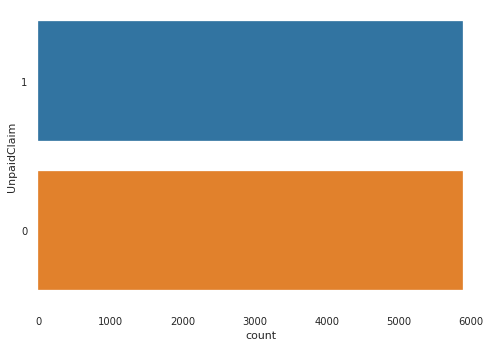

In [31]:
# look at values counts for the target
col = 'UnpaidClaim'
sns.countplot(y=procedure_data[col], order=procedure_data[col].value_counts().iloc[:5].index);
plt.savefig(os.path.join('../','visualization',f"{col}_barchart.png"))

In [32]:
procedure_data[col].value_counts()

1    5889
0    5889
Name: UnpaidClaim, dtype: int64

### Line.Of.Business.ID

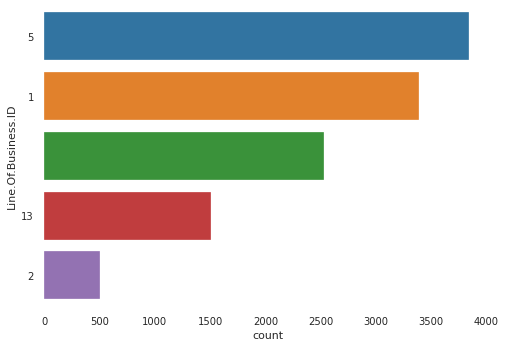

In [33]:
# look at line of business for procedure claims
col = 'Line.Of.Business.ID'
sns.countplot(y=procedure_data[col], order=procedure_data[col].value_counts().iloc[:5].index);
plt.savefig(os.path.join('../','visualization',f"{col}_barchart.png"))

In [34]:
procedure_data[col].value_counts()

5     3846
1     3387
      2527
13    1512
2      506
Name: Line.Of.Business.ID, dtype: int64

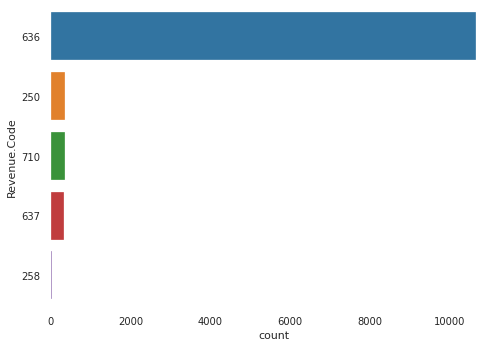

In [35]:
# look at line of business for procedure claims
# 636 drugs requiring detailed coding
# 637 self administrable drugs
# 710 general recovery room
# 250 pharmacy general
# 258 iv solutions
# https://med.noridianmedicare.com/web/jea/topics/claim-submission/revenue-codes
col = 'Revenue.Code'
sns.countplot(y=procedure_data[col], order=procedure_data[col].value_counts().iloc[:5].index);
plt.savefig(os.path.join('../','visualization',f"{col}_barchart.png"))

In [36]:
procedure_data[col].value_counts()

636    10666
250      368
710      366
637      346
258       24
259        7
490        1
Name: Revenue.Code, dtype: int64

### Service.Code

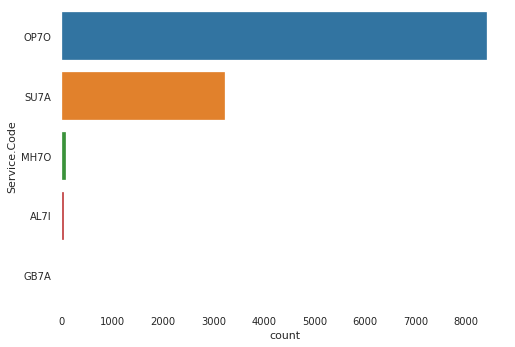

In [37]:
# look at line of business for procedure claims
# op70 collections and bad debt
# 
col = 'Service.Code'
sns.countplot(y=procedure_data[col], order=procedure_data[col].value_counts().iloc[:5].index);
plt.savefig(os.path.join('../','visualization',f"{col}_barchart.png"))

In [38]:
procedure_data[col].value_counts()

OP7O    8418
SU7A    3219
MH7O      74
AL7I      45
GB7A       8
           7
SA7A       6
CC8A       1
Name: Service.Code, dtype: int64

### Place.Of.Service.Code

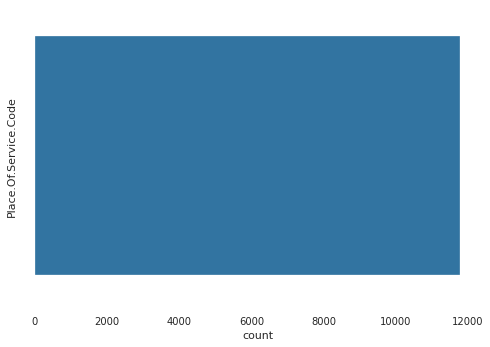

In [39]:
# look at line of business for procedure claims
col = 'Place.Of.Service.Code'
sns.countplot(y=procedure_data[col], order=procedure_data[col].value_counts().iloc[:5].index);
plt.savefig(os.path.join('../','visualization',f"{col}_barchart.png"))

In [40]:
procedure_data[col].value_counts()

     11778
Name: Place.Of.Service.Code, dtype: int64

### Diagnosis.Code

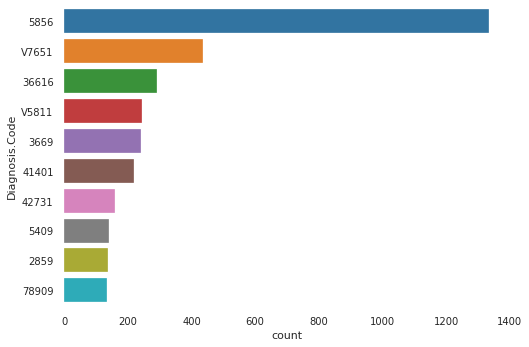

In [41]:
# 585.6 == End Stage Renal Disease
# v765.1 == Special screening for malignant neoplasms of colon
# 366.16 == Senile nuclear sclerosis (cataracts)
# 366.9 == cataract
# 414.01 == Coronary atherosclerosis of native coronary artery
# 427.31 == Atrial fibrillation
# 574.10 == Calculus of gallbladder with other cholecystitis, without mention of obstruction
# 540.9 == Other acute appendicitis
# 55090 == Inguinal hernia, without mention of obstruction or gangrene, unilateral or unspecified (not specified as recurrent)
# 592.1 == Calculus of ureter

# look at Diagnosis.Code for procedure claims
col = 'Diagnosis.Code'
sns.countplot(y=procedure_data[col], order=procedure_data[col].value_counts().iloc[:10].index);
plt.savefig(os.path.join('../','visualization',f"{col}_barchart.png"))

In [42]:
procedure_data[col].value_counts()

5856     1335
V7651     436
36616     292
V5811     245
3669      243
         ... 
80700       1
74365       1
1834        1
79092       1
V7269       1
Name: Diagnosis.Code, Length: 1060, dtype: int64

### Claim.Charge.Amount

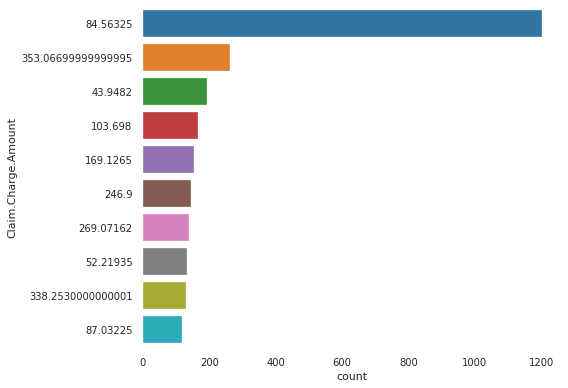

In [43]:
# look at charge amounts
col = 'Claim.Charge.Amount'
sns.countplot(y=procedure_data[col], order=procedure_data[col].value_counts().iloc[:10].index);
plt.tight_layout()
plt.savefig(os.path.join('../','visualization',f"{col}_barchart.png"))

In [44]:
procedure_data[col].value_counts()

84.563250     1202
353.067000     263
43.948200      194
103.698000     166
169.126500     154
              ... 
477.751500       1
111.845700       1
452.209700       1
101.204310       1
368.732805       1
Name: Claim.Charge.Amount, Length: 1742, dtype: int64

In [45]:
procedure_data[col].describe()

count    11778.000000
mean       220.167682
std        323.830611
min         31.109400
25%         86.415000
50%        147.843720
75%        261.244890
max       5845.357500
Name: Claim.Charge.Amount, dtype: float64

In [46]:
procedure_data.loc[procedure_data[col] == max(procedure_data[col])]

,Claim.Number,Claim.Line.Number,Member.ID,Provider.ID,Line.Of.Business.ID,Revenue.Code,Service.Code,Place.Of.Service.Code,Procedure.Code,Diagnosis.Code,Claim.Charge.Amount,Denial.Reason.Code,Price.Index,In.Out.Of.Network,Reference.Index,Pricing.Index,Capitation.Index,Subscriber.Payment.Amount,Provider.Payment.Amount,Group.Index,Subscriber.Index,Subgroup.Index,Claim.Type,Claim.Subscriber.Type,Claim.Pre.Prince.Index,Claim.Current.Status,Network.ID,Agreement.ID,UnpaidClaim
8150,1285255990,13,45729090,FA0001387002,1,636,OP7O,,J9045,V7283,5845.3575,PDC,A,I,V,N,N,0.0,2630.410875,572,37042600,0,M,H,,2,P00000000007,FH002449QPD1,0
8212,1440478790,19,45729090,FA0001387002,1,636,OP7O,,J9045,1820,5845.3575,PDC,A,I,V,N,N,0.0,2877.039285,572,37042600,0,M,H,,2,P00000000007,FH002449QPD1,0
8311,23437890,27,45729090,FA0001387002,1,636,OP7O,,J9045,1820,5845.3575,PDC,A,I,V,N,N,0.0,2922.678750,572,37042600,0,M,H,,2,P00000000007,FH002449QPD1,0
9863,120317190,2,89445574,FA1000015001,13,636,OP7O,,J9045,V5811,5845.3575,,A,I,N,N,,0.0,5845.357500,48546,72454900,0,E,H,,15,MIMAPD000002,A00BLCH0Q001,0
10122,120385690,5,89445574,FA1000015001,13,636,OP7O,,J9045,V5811,5845.3575,,A,I,N,N,,0.0,5845.357500,48546,72454900,0,E,H,,15,MIMAPD000002,A00BLCH0Q001,0
10123,120385690,6,89445574,FA1000015001,13,636,OP7O,,J9045,V5811,5845.3575,,A,I,N,N,,0.0,5845.357500,48546,72454900,0,E,H,,15,MIMAPD000002,A00BLCH0Q001,0
10439,120330090,4,89445574,FA1000015001,13,636,OP7O,,J9045,V5811,5845.3575,,A,I,N,N,,0.0,5845.357500,48546,72454900,0,E,H,,15,MIMAPD000002,A00BLCH0Q001,0


In [47]:
procedure_data.loc[procedure_data['Procedure.Code'] == 'J0180']

,Claim.Number,Claim.Line.Number,Member.ID,Provider.ID,Line.Of.Business.ID,Revenue.Code,Service.Code,Place.Of.Service.Code,Procedure.Code,Diagnosis.Code,Claim.Charge.Amount,Denial.Reason.Code,Price.Index,In.Out.Of.Network,Reference.Index,Pricing.Index,Capitation.Index,Subscriber.Payment.Amount,Provider.Payment.Amount,Group.Index,Subscriber.Index,Subgroup.Index,Claim.Type,Claim.Subscriber.Type,Claim.Pre.Prince.Index,Claim.Current.Status,Network.ID,Agreement.ID,UnpaidClaim


In [48]:
procedure_data.loc[procedure_data['Member.ID'] == 37576081]

,Claim.Number,Claim.Line.Number,Member.ID,Provider.ID,Line.Of.Business.ID,Revenue.Code,Service.Code,Place.Of.Service.Code,Procedure.Code,Diagnosis.Code,Claim.Charge.Amount,Denial.Reason.Code,Price.Index,In.Out.Of.Network,Reference.Index,Pricing.Index,Capitation.Index,Subscriber.Payment.Amount,Provider.Payment.Amount,Group.Index,Subscriber.Index,Subgroup.Index,Claim.Type,Claim.Subscriber.Type,Claim.Pre.Prince.Index,Claim.Current.Status,Network.ID,Agreement.ID,UnpaidClaim
7571,570847790,1,37576081,FA0001387002,1,250,OP7O,,J7050,2727,287.63850,PDC,A,I,V,N,N,0.0,149.572020,572,30438300,0,M,H,,2,P00000000007,FH002449QPD1,0
7572,570847790,2,37576081,FA0001387002,1,250,OP7O,,J7050,2727,209.24775,PDC,A,I,V,N,N,0.0,108.808830,572,30438300,0,M,H,,2,P00000000007,FH002449QPD1,0
7668,657244990,1,37576081,FA0001387002,1,250,OP7O,,J7050,2727,209.24775,PDC,A,I,V,N,N,0.0,104.623875,572,30438300,0,M,H,,2,P00000000007,FH002449QPD1,0
7669,657244990,2,37576081,FA0001387002,1,250,OP7O,,J7050,2727,209.24775,PDC,A,I,V,N,N,0.0,104.623875,572,30438300,0,M,H,,2,P00000000007,FH002449QPD1,0


In [49]:
procedure_data.loc[procedure_data[col] == min(procedure_data[col])]

,Claim.Number,Claim.Line.Number,Member.ID,Provider.ID,Line.Of.Business.ID,Revenue.Code,Service.Code,Place.Of.Service.Code,Procedure.Code,Diagnosis.Code,Claim.Charge.Amount,Denial.Reason.Code,Price.Index,In.Out.Of.Network,Reference.Index,Pricing.Index,Capitation.Index,Subscriber.Payment.Amount,Provider.Payment.Amount,Group.Index,Subscriber.Index,Subgroup.Index,Claim.Type,Claim.Subscriber.Type,Claim.Pre.Prince.Index,Claim.Current.Status,Network.ID,Agreement.ID,UnpaidClaim
7188,239180990,3,1988595,FA0001387002,5,636,OP7O,,J7506,6930,31.1094,K62,A,I,N,N,,0.0,22.677765,114,1610850,0,M,H,S,2,P00000000001,FH001311QB01,0
7417,355922490,7,1990817,FA0001387002,5,636,OP7O,,J7506,9953,31.1094,K54,A,I,N,N,,0.0,22.677765,114,1612650,0,M,H,S,2,P00000000001,FH001311QB01,0
7435,364717090,5,1990076,FA0001387002,5,636,OP7O,,J7506,5693,31.1094,K62,A,I,N,N,,0.0,22.677765,114,1612050,0,M,H,S,2,P00000000001,FH001311QB01,0
7515,462150690,10,1992978,FA0001387002,5,636,OP7O,,J7506,9951,31.1094,K62,A,I,N,N,,0.0,18.147150,114,1614400,0,M,H,S,2,P00000000001,FH001311QB01,0


### Denial.Reason.Code

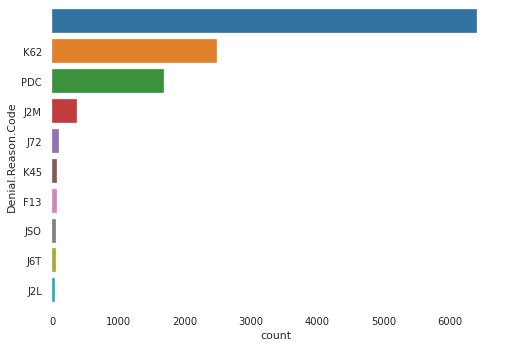

In [50]:
# k62 THIS SERVICE IS NOT PAID. THE PROCEDURE EXCEEDED MAX UNITS ALLOWED PER DATE 
# OF SERVICE ON THIS CLAIM OR ANOTHER CLAIM FOR SAME DOS.
# PDC — Billed amount is higher than the maximum payment insurance allows. The payment is for the allowed amount.
col = 'Denial.Reason.Code'
sns.countplot(y=procedure_data[col], order=procedure_data[col].value_counts().iloc[:10].index);
plt.savefig(os.path.join('../','visualization',f"{col}_barchart.png"))

In [51]:
# k62 THIS SERVICE IS NOT PAID. THE PROCEDURE EXCEEDED MAX UNITS ALLOWED PER DATE 
# OF SERVICE ON THIS CLAIM OR ANOTHER CLAIM FOR SAME DOS.
# PDC — Billed amount is higher than the maximum payment insurance allows. The payment is for the allowed amount.
procedure_data[col].value_counts()

       6416
K62    2479
PDC    1684
J2M     368
J72      96
       ... 
TR2       1
JZB       1
JD3       1
JAQ       1
KKB       1
Name: Denial.Reason.Code, Length: 72, dtype: int64

### Price.Index

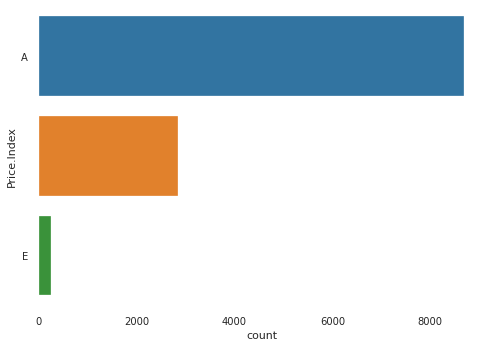

In [52]:
# look at priced index
col = 'Price.Index'
sns.countplot(y=procedure_data[col], order=procedure_data[col].value_counts().iloc[:10].index);
plt.savefig(os.path.join('../','visualization',f"{col}_barchart.png"))

In [53]:
procedure_data[col].value_counts().iloc[:10]

A    8682
     2838
E     258
Name: Price.Index, dtype: int64

### In.Out.Of.Network

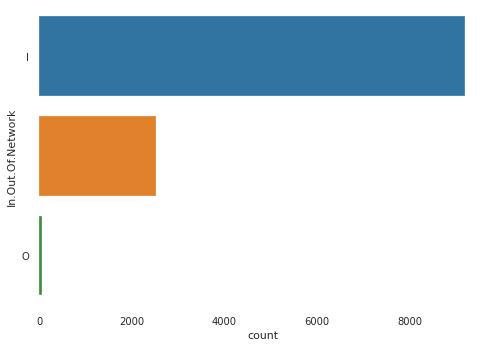

In [54]:
# look at in versus out of network
col = 'In.Out.Of.Network'
sns.countplot(y=procedure_data[col], order=procedure_data[col].value_counts().iloc[:10].index);
plt.savefig(os.path.join('../','visualization',f"{col}_barchart.png"))

In [55]:
procedure_data[col].value_counts().iloc[:10]

I    9190
     2523
O      65
Name: In.Out.Of.Network, dtype: int64

### Reference.Index

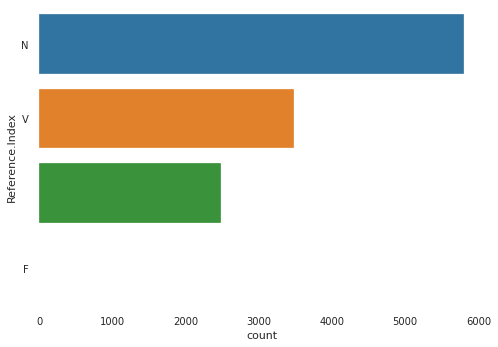

In [56]:
col = 'Reference.Index'
sns.countplot(y=procedure_data[col], order=procedure_data[col].value_counts().iloc[:10].index);
plt.savefig(os.path.join('../','visualization',f"{col}_barchart.png"))

In [57]:
# look at reference index
col = 'Reference.Index'
procedure_data[col].value_counts(ascending=False).head(10)

N    5808
V    3476
     2490
F       4
Name: Reference.Index, dtype: int64

### Pricing.Index

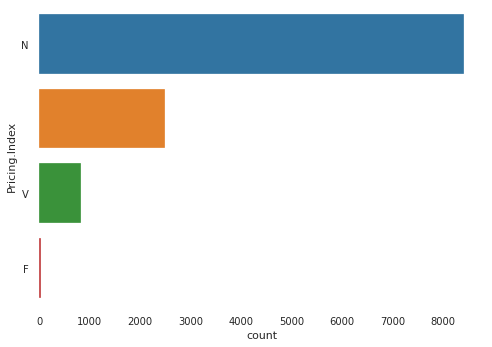

In [58]:
col = 'Pricing.Index'
sns.countplot(y=procedure_data[col], order=procedure_data[col].value_counts().iloc[:10].index);
plt.savefig(os.path.join('../','visualization',f"{col}_barchart.png"))

In [59]:
# look at pricing index
procedure_data[col].value_counts(ascending=False).head(10)

N    8422
     2490
V     830
F      36
Name: Pricing.Index, dtype: int64

### Capitation.Index

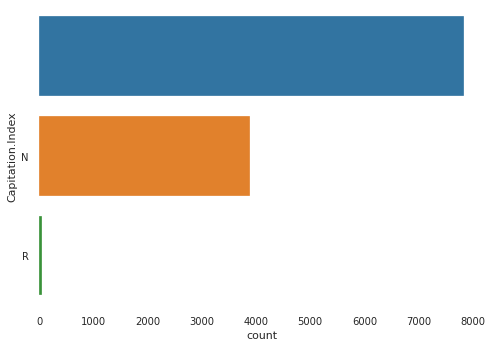

In [60]:
col = 'Capitation.Index'
sns.countplot(y=procedure_data[col], order=procedure_data[col].value_counts().iloc[:10].index);
plt.savefig(os.path.join('../','visualization',f"{col}_barchart.png"))

In [61]:
# look at capitation index
procedure_data[col].value_counts(ascending=False).head(10)

     7843
N    3888
R      47
Name: Capitation.Index, dtype: int64

### Subscriber.Payment.Amount

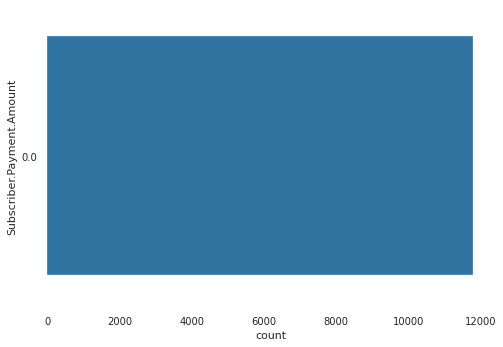

In [62]:
col = 'Subscriber.Payment.Amount'
sns.countplot(y=procedure_data[col], order=procedure_data[col].value_counts().iloc[:10].index);
plt.savefig(os.path.join('../','visualization',f"{col}_barchart.png"))

In [63]:
# look at subscriber payment amount
procedure_data[col].value_counts(ascending=False).head(10)

0.0    11778
Name: Subscriber.Payment.Amount, dtype: int64

### Provider.Payment.Amount

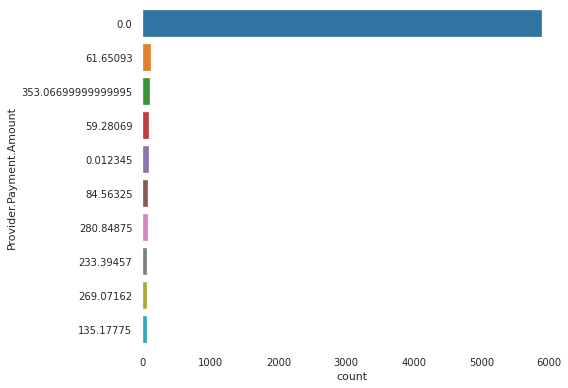

In [64]:
col ='Provider.Payment.Amount'
sns.countplot(y=procedure_data[col], order=procedure_data[col].value_counts().iloc[:10].index);
plt.tight_layout()
plt.savefig(os.path.join('../','visualization',f"{col}_barchart.png"))

In [65]:
# look at provider payment amount
procedure_data[col].value_counts(ascending=False).head(10)

0.000000      5889
61.650930      113
353.067000     100
59.280690       96
0.012345        85
84.563250       79
280.848750      72
233.394570      60
269.071620      59
135.177750      57
Name: Provider.Payment.Amount, dtype: int64

### Group.Index

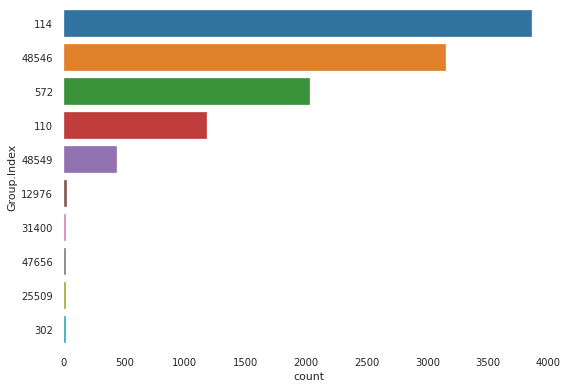

In [66]:
col ='Group.Index'
sns.countplot(y=procedure_data[col], order=procedure_data[col].value_counts().iloc[:10].index);
plt.tight_layout()
plt.savefig(os.path.join('../','visualization',f"{col}_barchart.png"))

In [67]:
# look at group index
procedure_data[col].value_counts(ascending=False).head(10)

114      3861
48546    3156
572      2036
110      1179
48549     443
12976      26
31400      24
47656      22
25509      21
302        21
Name: Group.Index, dtype: int64

### Subscriber.Index

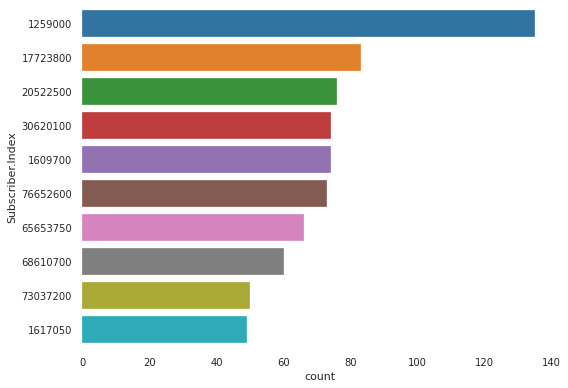

In [68]:
col ='Subscriber.Index'
sns.countplot(y=procedure_data[col], order=procedure_data[col].value_counts().iloc[:10].index);
plt.tight_layout()
plt.savefig(os.path.join('../','visualization',f"{col}_barchart.png"))

In [69]:
# look at subscriber index
procedure_data[col].value_counts(ascending=False).head(10)

1259000     135
17723800     83
20522500     76
30620100     74
1609700      74
76652600     73
65653750     66
68610700     60
73037200     50
1617050      49
Name: Subscriber.Index, dtype: int64

In [70]:
procedure_data.loc[procedure_data['Subscriber.Index'] == 1259000, ['Subscriber.Index']]

,Subscriber.Index
2769,1259000
6786,1259000
6787,1259000
6788,1259000
6789,1259000
...,...
7244,1259000
7550,1259000
7796,1259000
8037,1259000


### Subgroup.Index

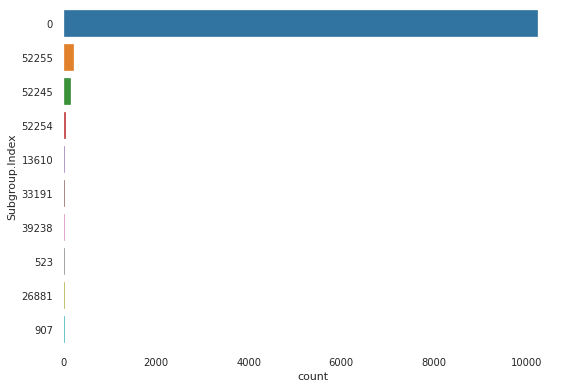

In [71]:
col = 'Subgroup.Index'
sns.countplot(y=procedure_data[col], order=procedure_data[col].value_counts().iloc[:10].index);
plt.tight_layout()
plt.savefig(os.path.join('../','visualization',f"{col}_barchart.png"))

In [72]:
# look at sub-group index
procedure_data[col].value_counts(ascending=False).head(10)

0        10254
52255      230
52245      162
52254       46
13610       26
33191       24
39238       21
523         21
26881       21
907         20
Name: Subgroup.Index, dtype: int64

### Claim.Type

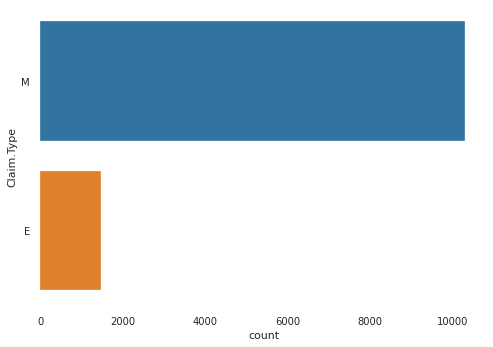

In [73]:
col = 'Claim.Type'
sns.countplot(y=procedure_data[col], order=procedure_data[col].value_counts().iloc[:10].index);
plt.savefig(os.path.join('../','visualization',f"{col}_barchart.png"))

In [74]:
# look at claim type
procedure_data[col].value_counts(ascending=False).head(10)

M    10308
E     1470
Name: Claim.Type, dtype: int64

### Claim.Subscriber.Type

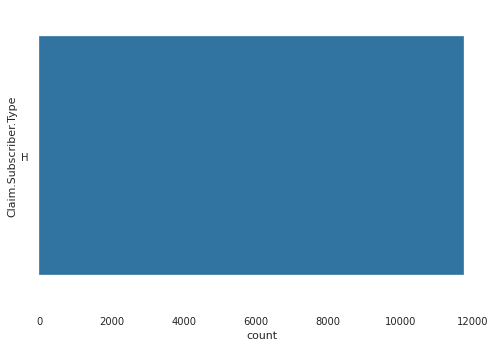

In [75]:
col = 'Claim.Subscriber.Type'
sns.countplot(y=procedure_data[col], order=procedure_data[col].value_counts().iloc[:10].index);
plt.savefig(os.path.join('../','visualization',f"{col}_barchart.png"))

In [76]:
# look at subsriber type
procedure_data[col].value_counts(ascending=False).head(10)

H    11778
Name: Claim.Subscriber.Type, dtype: int64

### Claim.Pre.Prince.Index

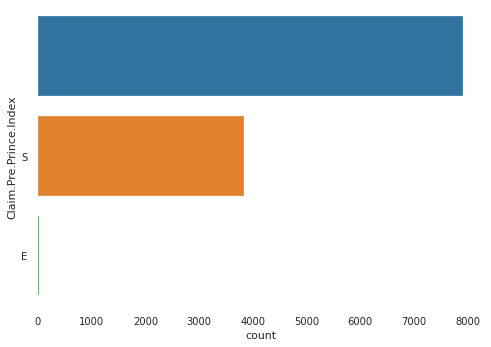

In [77]:
col = 'Claim.Pre.Prince.Index'
sns.countplot(y=procedure_data[col], order=procedure_data[col].value_counts().iloc[:10].index);
plt.savefig(os.path.join('../','visualization',f"{col}_barchart.png"))

In [78]:
# look at claim pre price index
procedure_data[col].value_counts(ascending=False).head(10)

     7917
S    3846
E      15
Name: Claim.Pre.Prince.Index, dtype: int64

### Claim.Current.Status

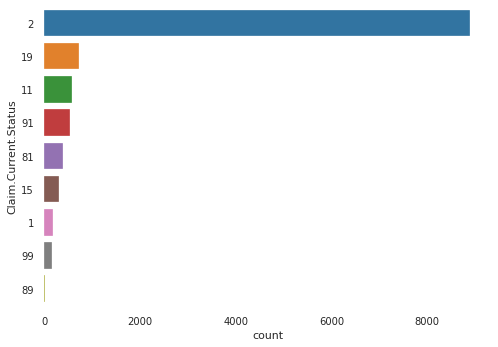

In [79]:
col = 'Claim.Current.Status'
sns.countplot(y=procedure_data[col], order=procedure_data[col].value_counts().iloc[:10].index);
plt.savefig(os.path.join('../','visualization',f"{col}_barchart.png"))

In [80]:
# look at claim current status
procedure_data[col].value_counts(ascending=False).head(10)

2     8892
19     730
11     581
91     537
81     394
15     303
1      175
99     164
89       2
Name: Claim.Current.Status, dtype: int64

### Network.ID

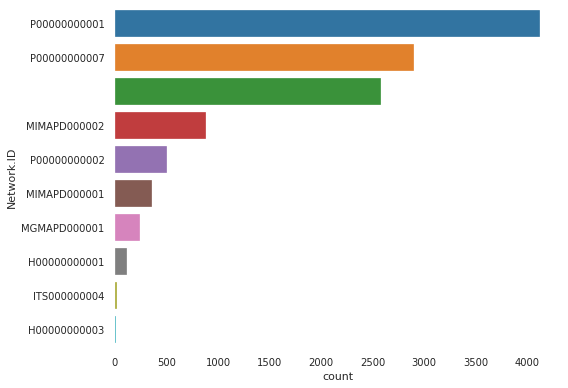

In [81]:
col = 'Network.ID'
sns.countplot(y=procedure_data[col], order=procedure_data[col].value_counts().iloc[:10].index);
plt.tight_layout()
plt.savefig(os.path.join('../','visualization',f"{col}_barchart.png"))

In [82]:
# network id
procedure_data[col].value_counts(ascending=False).head(20)

P00000000001    4129
P00000000007    2907
                2579
MIMAPD000002     882
P00000000002     502
MIMAPD000001     364
MGMAPD000001     241
H00000000001     121
ITS000000004      20
H00000000003      13
H00000000002      11
H00000000004       4
P00000000003       3
P00000000009       2
Name: Network.ID, dtype: int64

### Agreement.ID

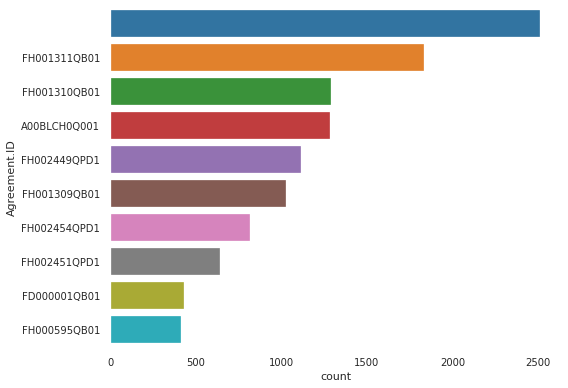

In [83]:
col = 'Agreement.ID'
sns.countplot(y=procedure_data[col], order=procedure_data[col].value_counts().iloc[:10].index);
plt.tight_layout()
plt.savefig(os.path.join('../','visualization',f"{col}_barchart.png"))

In [84]:
# agreement id
procedure_data[col].value_counts(ascending=False)

                2514
FH001311QB01    1834
FH001310QB01    1289
A00BLCH0Q001    1283
FH002449QPD1    1115
FH001309QB01    1028
FH002454QPD1     815
FH002451QPD1     642
FD000001QB01     429
FH000595QB01     410
PI003247QM03     131
FH002441QPD1      91
A00MANL0QM01      42
PI003241QM01      40
LH000595QM01      24
FH001885QH01      23
A00ITS01Q001      20
PI003241QM03      19
PI003247QM01      15
FH001886QH01       6
FH001884QH01       5
FH000000Q001       3
Name: Agreement.ID, dtype: int64

### Provider.ID

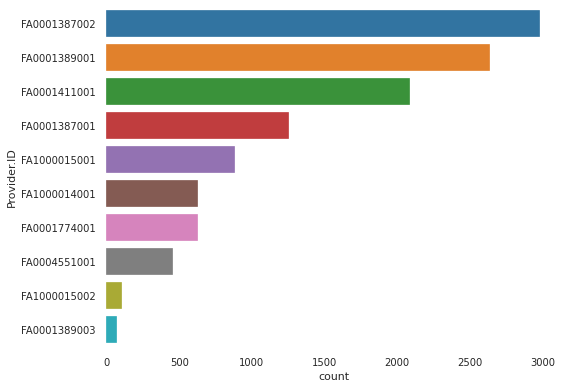

In [85]:
col = 'Provider.ID'
sns.countplot(y=procedure_data[col], order=procedure_data[col].value_counts().iloc[:10].index);
plt.tight_layout()
plt.savefig(os.path.join('../','visualization',f"{col}_barchart.png"))

In [86]:
# agreement id
procedure_data[col].value_counts(ascending=False).head(10)

FA0001387002    2981
FA0001389001    2636
FA0001411001    2089
FA0001387001    1258
FA1000015001     884
FA1000014001     631
FA0001774001     627
FA0004551001     458
FA1000015002     107
FA0001389003      71
Name: Provider.ID, dtype: int64

## Data Profile

In [87]:
import numpy as np
import pandas as pd
from pandas_profiling import ProfileReport
import os

produce_report = True

if produce_report:
    # produce profile report
    profile = ProfileReport(procedure_data, title="Procedure Data Report", minimal=True);

    # show profile in notebook
    profile.to_widgets();
    
    # save profile to visalizations folder
    profile.to_file(os.path.join('../visualization','Procedure_Data_Report.html'))


In [88]:
# show saved report
IFrame(src=os.path.join('../visualization','Procedure_Data_Report.html'), width=950, height=400)

## Drop Columns after EDA

In [89]:
# drop columns ['Claim.Subscriber.Type', Subscriber.Payment.Amount', 'Place.Of.Service.Code']
procedure_data.drop(GetDict('feature_info.json')['dropped_columns'], 
                    inplace=True, axis=1)

# replace blank values with NaN
procedure_data = procedure_data.applymap(lambda x: np.nan if isinstance(x, str) and x.isspace() else x)

# convert Line.of.Business.ID and Group.Index to an object an set NaN values to missing
procedure_data['Line.Of.Business.ID'] = procedure_data['Line.Of.Business.ID'].fillna('missing')
procedure_data['Group.Index'] = procedure_data['Group.Index'].fillna('missing')

# add cleaned file to cleaned folder
procedure_data.to_csv(os.path.join('../data','cleaned','procedure_data.tar.gz'), compression='gzip', index=False)

In [90]:
# make sure columns are removed
procedure_data.head()

,Provider.ID,Line.Of.Business.ID,Service.Code,Procedure.Code,Diagnosis.Code,Claim.Charge.Amount,Price.Index,Reference.Index,Pricing.Index,Group.Index,Claim.Type,Network.ID,Agreement.ID,UnpaidClaim
0,FA0001774001,1,SU7A,J1100,7350,87.896400,A,V,N,572,M,P00000000007,FH002441QPD1,1
1,FA0001411001,5,SU7A,J7030,8248,200.482800,A,N,N,114,M,P00000000001,FH001310QB01,1
2,FA0001387002,1,OP7O,J2250,V7651,84.563250,NaN,N,N,572,M,P00000000007,FH002449QPD1,1
3,FA0001389001,1,SU7A,J1100,17351,210.889635,A,V,N,572,M,P00000000007,FH001309QB01,1
4,FA1000015001,missing,OP7O,J1644,5856,353.067000,NaN,N,N,48549,E,NaN,NaN,1


In [91]:
# show data set information
procedure_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11778 entries, 0 to 11777
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Provider.ID          11778 non-null  object 
 1   Line.Of.Business.ID  11778 non-null  object 
 2   Service.Code         11771 non-null  object 
 3   Procedure.Code       11778 non-null  object 
 4   Diagnosis.Code       11778 non-null  object 
 5   Claim.Charge.Amount  11778 non-null  float64
 6   Price.Index          8940 non-null   object 
 7   Reference.Index      9288 non-null   object 
 8   Pricing.Index        9288 non-null   object 
 9   Group.Index          11778 non-null  int64  
 10  Claim.Type           11778 non-null  object 
 11  Network.ID           9199 non-null   object 
 12  Agreement.ID         9264 non-null   object 
 13  UnpaidClaim          11778 non-null  int64  
dtypes: float64(1), int64(2), object(11)
memory usage: 1.3+ MB
